In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
df = pd.read_csv("C:/Users/ROHIT/Documents/sathvika/archive (8)/netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.shape
df.info()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [7]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [8]:
df.drop_duplicates(inplace=True)
df.dropna(subset=['type', 'title', 'release_year'], inplace=True)

Text(0, 0.5, 'Count')

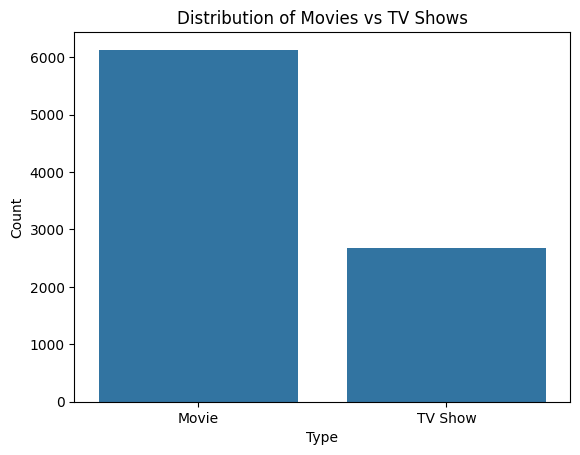

In [9]:
sns.countplot(x='type', data=df)
plt.title("Distribution of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")


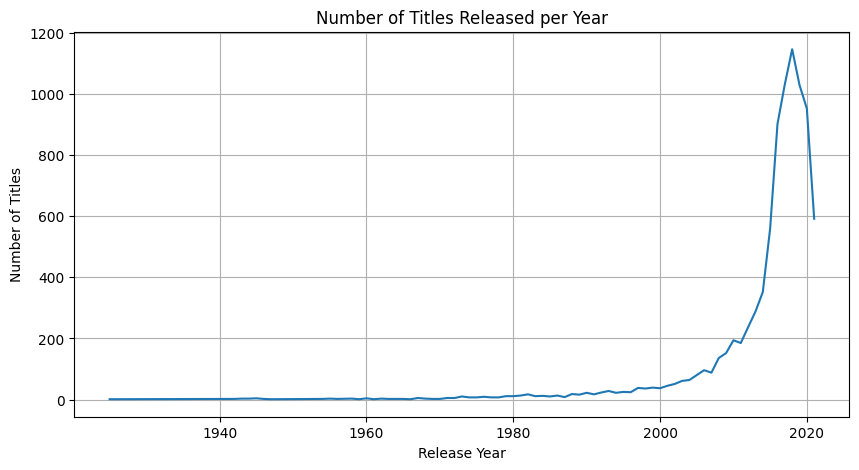

In [10]:
plt.figure(figsize=(10,5))
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title("Number of Titles Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(True)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, ' United States'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'France'),
  Text(7, 0, 'South Korea'),
  Text(8, 0, ' France'),
  Text(9, 0, 'Spain')])

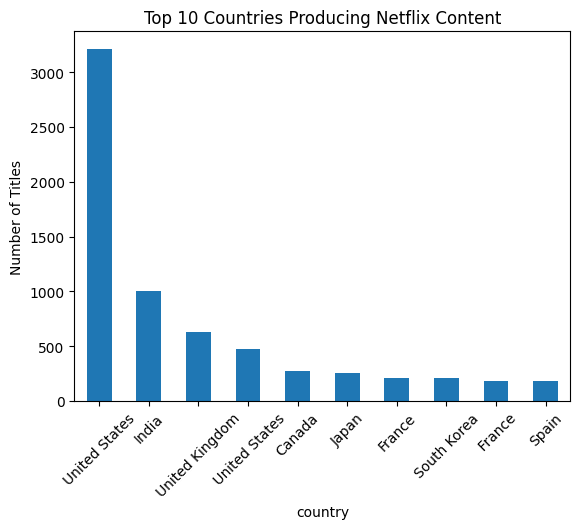

In [11]:
df['country'].dropna().str.split(',').explode().value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries Producing Netflix Content")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2008.0'),
  Text(1, 0, '2009.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2011.0'),
  Text(4, 0, '2012.0'),
  Text(5, 0, '2013.0'),
  Text(6, 0, '2014.0'),
  Text(7, 0, '2015.0'),
  Text(8, 0, '2016.0'),
  Text(9, 0, '2017.0'),
  Text(10, 0, '2018.0'),
  Text(11, 0, '2019.0'),
  Text(12, 0, '2020.0'),
  Text(13, 0, '2021.0')])

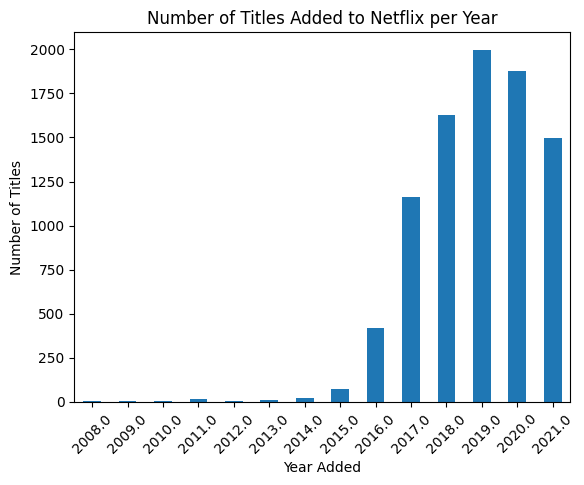

In [12]:
df['year_added'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Titles Added to Netflix per Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Correlation Between Release Year and Date Added')

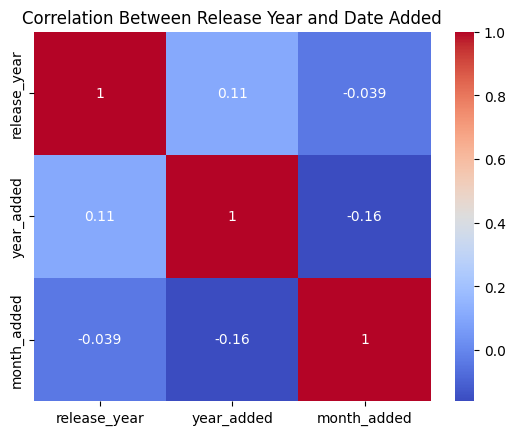

In [13]:
sns.heatmap(df[['release_year', 'year_added', 'month_added']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Release Year and Date Added")


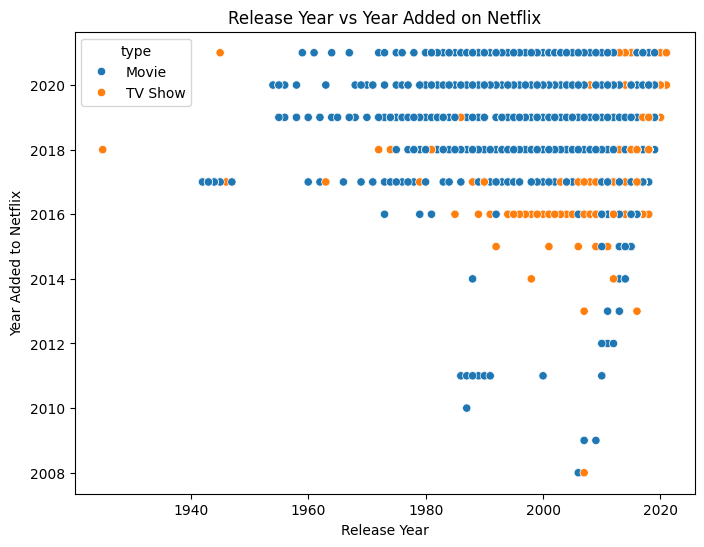

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='release_year', y='year_added', hue='type', data=df)
plt.title("Release Year vs Year Added on Netflix")
plt.xlabel("Release Year")
plt.ylabel("Year Added to Netflix")
plt.show()


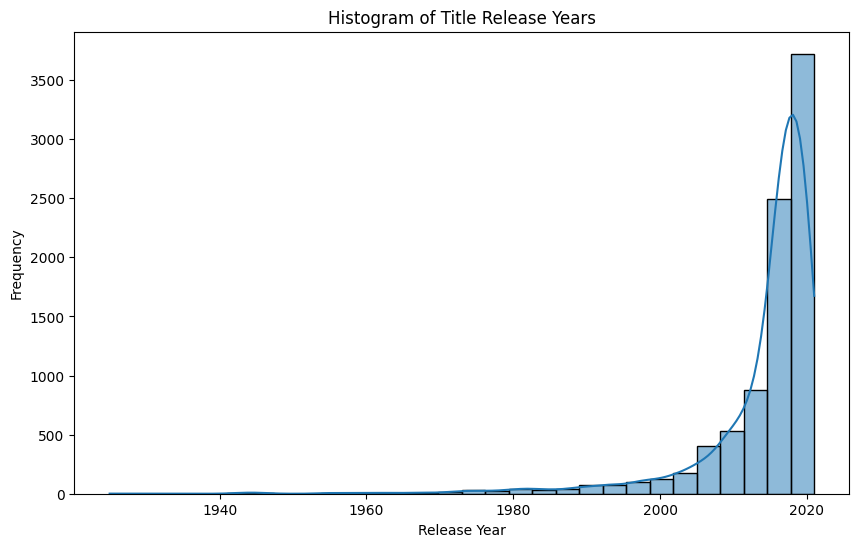

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title("Histogram of Title Release Years")
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.show()


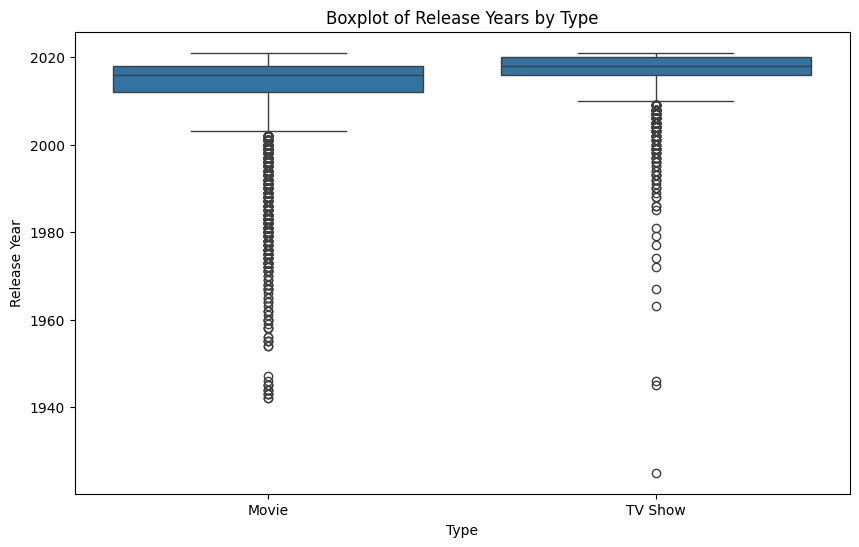

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='release_year', data=df)
plt.title("Boxplot of Release Years by Type")
plt.xlabel("Type")
plt.ylabel("Release Year")
plt.show()


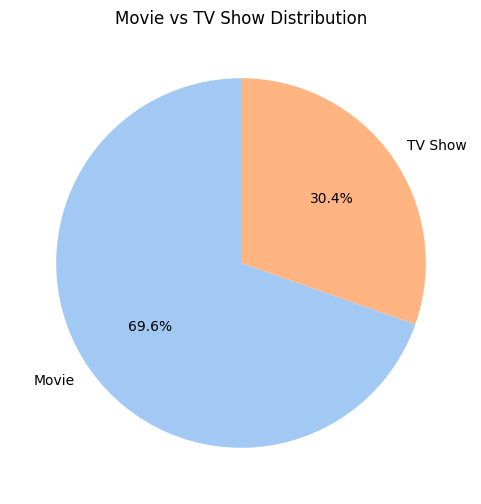

In [17]:
plt.figure(figsize=(6,6))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Movie vs TV Show Distribution")
plt.ylabel("")
plt.show()
